# BERT (Bidirectional Encoder Representations from Transformers)

BERT is a transformer-based machine learning technique for natural language processing (NLP) pre-training. It stands for Bidirectional Encoder Representations from Transformers. It was created and published in 2018 by Jacob Devlin and his colleagues from Google.

## How it Works

BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.

BERT is pre-trained using a combination of masked language modeling objective and next sentence prediction on a large corpus comprising the Toronto Book Corpus and Wikipedia.

## Use Cases

BERT has a wide range of applications, including but not limited to:

- **Question Answering**: BERT can be used in question answering systems to provide precise answers to user queries.

- **Sentiment Analysis**: BERT can understand the context of each word in a given text, making it excellent for sentiment analysis.

- **Named Entity Recognition**: BERT can be used to identify entities in a text such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

## Limitations

Despite its advantages, BERT also has some limitations:

- **Computational Resources**: Training BERT from scratch requires a significant amount of computational resources and is a time-consuming process.

- **Lack of Transparency**: Like other deep learning models, BERT can be seen as a "black box" and can be difficult to interpret.

- **Contextual Ambiguity**: While BERT is designed to understand the context of words, it may still struggle with words that have multiple meanings based on context.

# BERT (Двунаправленные представления кодировщика от трансформеров)

BERT - это техника машинного обучения, основанная на трансформерах, для предварительного обучения в области обработки естественного языка (NLP). Он представляет собой Двунаправленные представления кодировщика от трансформеров. Он был создан и опубликован в 2018 году Джейкобом Девлином и его коллегами из Google.

## Как это работает

BERT предназначен для предварительного обучения глубоких двунаправленных представлений из неразмеченного текста, совместно условившись на обоих контекстах слева и справа на всех уровнях. В результате предварительно обученная модель BERT может быть дополнительно настроена всего с одним дополнительным выходным слоем, чтобы создать передовые модели для широкого спектра задач, таких как ответ на вопросы и вывод языка, без существенных модификаций архитектуры, специфичных для задачи.

BERT предварительно обучается с использованием комбинации целей моделирования языка с маской и прогнозирования следующего предложения на большом корпусе, включающем корпус книг Торонто и Википедию.

## Варианты использования

У BERT есть широкий спектр применений, включая:

- **Ответ на вопросы**: BERT может использоваться в системах ответов на вопросы для предоставления точных ответов на запросы пользователей.

- **Анализ тональности**: BERT может понимать контекст каждого слова в данном тексте, что делает его отличным для анализа тональности.

- **Распознавание именованных сущностей**: BERT может использоваться для идентификации сущностей в тексте, таких как имена людей, организаций, местоположений, медицинских кодов, временных выражений, количеств, денежных значений, процентов и т.д.

## Ограничения

Несмотря на свои преимущества, у BERT также есть некоторые ограничения:

- **Вычислительные ресурсы**: Обучение BERT с нуля требует значительного количества вычислительных ресурсов и занимает много времени.

- **Отсутствие прозрачности**: Как и другие модели глубокого обучения, BERT может рассматриваться как "черный ящик" и может быть сложным для интерпретации.

- **Контекстуальная неоднозначность**: Хотя BERT разработан для понимания контекста слов, он все равно может столкнуться со словами, имеющими несколько значений в зависимости от контекста.

[BERT for "Everyone" (Tutorial + Implementation)](https://www.kaggle.com/code/harshjain123/bert-for-everyone-tutorial-implementation)

# 1. Import Required Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
import pandas as pd

def read_csv_from_url(url):
    df = pd.read_csv(url)
    return df

url = "https://raw.githubusercontent.com/prateekjoshi565/Fine-Tuning-BERT/master/spamdata_v2.csv"
df = read_csv_from_url(url)
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


The dataset consists of two columns – “label” and “text”. The column “text” contains the message body and the “label” is a binary variable where 1 means spam and 0 means the message is not a spam.

Набор данных состоит из двух столбцов - “label” и “text”. Столбец “text” содержит текст сообщения, а “label” - это бинарная переменная, где 1 означает спам, а 0 означает, что сообщение не является спамом.

In [3]:
# check class distribution
df['label'].value_counts(normalize = True)

0    0.865937
1    0.134063
Name: label, dtype: float64

# 2. Split the Dataset into train / test

In [4]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

# 3. Import Bert - base- uncased

In [5]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<Axes: >

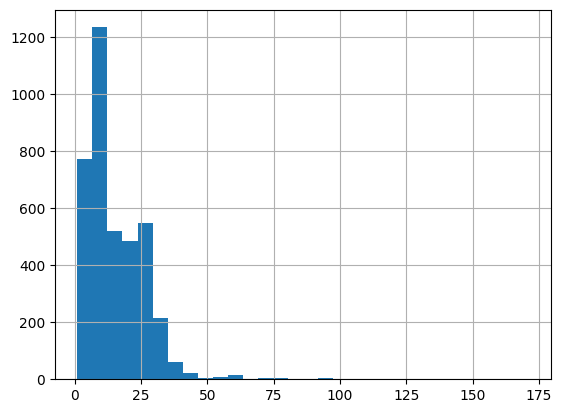

In [6]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

# 4. Tokenize & Encode the Sequences

**Which Tokenization strategy is used by BERT?**
BERT uses WordPiece tokenization. The vocabulary is initialized with all the individual characters in the language, and then the most frequent/likely combinations of the existing words in the vocabulary are iteratively added.

**What is the maximum sequence length of the input?**
The maximum sequence length of the input = 512

**Какую стратегию токенизации использует BERT?**
BERT использует токенизацию WordPiece. Словарь инициализируется всеми отдельными символами в языке, а затем в словарь итеративно добавляются наиболее частые/вероятные комбинации существующих слов.

**Какова максимальная длина входной последовательности?**
Максимальная длина входной последовательности = 512

In [23]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    padding=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    padding=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    padding=True,
    truncation=True
)

# 5. List to Tensors

In [8]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

# 6. Data Loader

In [9]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# 7. Model Architecture

In [10]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [11]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)

        return x

In [12]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [13]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [14]:
import numpy as np

# Get unique classes and their counts
classes, counts = np.unique(train_labels, return_counts=True)

# Compute class weights
class_weights = len(train_labels) / (len(classes) * counts)

print("Class Weights:", class_weights)

Class Weights: [0.57743559 3.72848948]


In [15]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10

# 8. Fine - Tune

In [16]:
# function to train the model
def train():

    model.train()
    total_loss, total_accuracy = 0, 0

    # empty list to save model predictions
    total_preds=[]

    # iterate over batches
    for step,batch in enumerate(train_dataloader):

        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch

        # clear previously calculated gradients
        model.zero_grad()

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [17]:
# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [18]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.678
Validation Loss: 0.657

 Epoch 2 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.648
Validation Loss: 0.628

 Epoch 3 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.626
Validation Loss: 0.602

 Epoch 4 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.603
Validation Loss: 0.579

 Epoch 5 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.574
Validation Loss: 0.560

 Epoch 6 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.557
Validation Loss: 0.529

 Epoch 7 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.535
Validation Loss: 0.509

 Epoch 8 / 10
  Batch    50  of    122.
  Batch   100  of    122.

Evaluating...

Training Loss: 0.515
Validat

In [19]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

# 9. Make Predictions

In [20]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [21]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       724
           1       0.46      0.81      0.59       112

    accuracy                           0.85       836
   macro avg       0.72      0.83      0.75       836
weighted avg       0.90      0.85      0.87       836

